<a href="https://colab.research.google.com/github/IYORIYAGAMI/OPEN-SOURCE/blob/main/SVM_KNN_%26_ARIMA_SARIMA_11%2612Oct_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is SVM?

SVM stands for Support Vector Machine.
It’s a supervised machine learning algorithm used mostly for classification tasks (and sometimes for regression).

Its main goal is simple:

Find the best possible line (or plane, or hyperplane) that separates data points of different classes with the maximum margin.

That means SVM tries to divide your data as clearly as possible while keeping the line as far away from both classes as it can.

# Example:
Imagine you have two types of points — say, red dots and blue dots — scattered on a 2D plane.                                                              There can be many lines that separate them, but SVM looks for the one that is the most balanced — the line that keeps the largest distance (margin) from the nearest red and blue points.

Those closest points that touch the margin are called support vectors.
They are very important because they define the decision boundary.

If you remove other points, the boundary doesn’t change — but if you remove the support vectors, the boundary shifts.

# Hyperplane:
It’s the decision boundary that divides the data.
In 2D, it’s a line.
In 3D, it’s a flat plane.
In higher dimensions, it’s called a hyperplane.

# Support Vectors:
These are the data points closest to the boundary.
They “support” the position of the hyperplane — that’s why the algorithm is called Support Vector Machine.

# Margin:
It’s the distance between the hyperplane and the nearest support vectors.
SVM tries to maximize this margin — the wider the margin, the more confident the classifier is.

Sometimes, data cannot be separated by a straight line — imagine points arranged in a circle.
In this case, SVM uses something called a Kernel Function.

The kernel transforms the data into a higher dimension where it can be separated by a straight line.
It’s like lifting the data off the page into 3D space so you can slice it more easily.

# Common kernel types:

Linear Kernel: when the data is already linearly separable.

Polynomial Kernel: when the relationship between classes looks like a curve.

# Important Parameters

C (Regularization Parameter):
This controls the trade-off between maximizing the margin and correctly classifying training examples.

A large C means the model tries hard to classify everything correctly but might overfit.

A small C allows some misclassifications but gives a smoother, more general boundary.

Gamma (for RBF Kernel):
It controls how far the influence of a single training example reaches.

A small gamma means the model considers points farther away, resulting in smoother boundaries.

A large gamma makes the model very sensitive to nearby points, which can lead to overfitting.

# Where SVM is Used

Text classification: such as spam vs non-spam emails.

Image recognition: like face or handwriting detection.

Bioinformatics: identifying whether a tumor is malignant or benign.

Finance: detecting fraud or risk categories.

# Strengths:

Works very well with small to medium datasets.

Effective in high-dimensional spaces.

Can handle complex, non-linear data using kernels.

# Weaknesses:

Not ideal for very large datasets (slow training).

Choosing the right kernel and parameters (C, gamma) can be tricky.

Doesn’t perform well when data is very noisy or overlapping.

# Support Vector Machine =
Find the line (or plane) that separates classes best — with the widest possible gap — using only the most important data points (support vectors).

In [1]:
# Step 1: Import all necessary libraries

# numpy is used for mathematical operations
import numpy as np

# pandas is used for handling data in table format
import pandas as pd

# matplotlib is used for plotting graphs
import matplotlib.pyplot as plt

# sklearn provides machine learning tools and datasets
from sklearn.datasets import make_classification     # to create sample data
from sklearn.model_selection import train_test_split  # to split data
from sklearn.preprocessing import StandardScaler      # to scale features
from sklearn.svm import SVC                           # Support Vector Classifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report, roc_curve, auc)


In [2]:
# Step 2: Create a simple 2D dataset for easy visualization
# make_classification helps us generate fake but realistic classification data

X, y = make_classification(
    n_samples=200,        # total number of data points
    n_features=2,         # we use 2 features so we can plot them in 2D
    n_redundant=0,        # no redundant features
    n_clusters_per_class=1,
    class_sep=1.2,        # how far apart the classes are (larger means easier separation)
    random_state=42       # for reproducibility
)

# Let's put this data into a pandas DataFrame so we can view it
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
data['Target'] = y

# Show the first 5 rows of our data
print("Preview of dataset:")
print(data.head())


Preview of dataset:
   Feature 1  Feature 2  Target
0  -0.672929   0.213042       1
1   1.512935   2.970534       1
2   2.540428   2.620996       1
3   2.494548  -0.204380       1
4   1.144105   0.677241       1


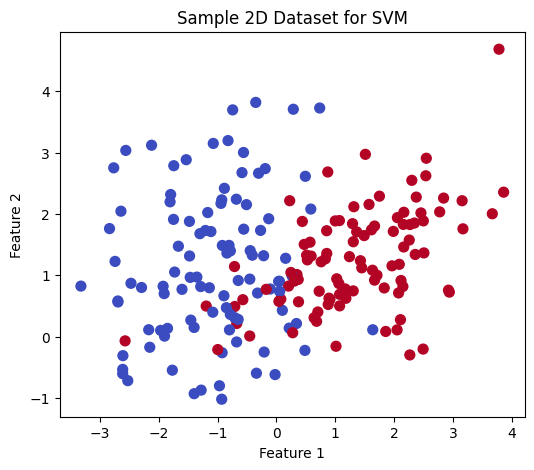

In [3]:
# Step 3: Visualize our two classes in a scatter plot
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=50)
plt.title("Sample 2D Dataset for SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [4]:
# Step 4: Split the data into training and testing sets
# This helps us test how well the model generalizes to unseen data

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% data for testing
    random_state=42,      # reproducibility
    stratify=y            # keeps class balance same in train and test
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 140
Testing samples: 60


In [5]:
# Step 5: Scale the features
# SVMs are sensitive to feature scales (large values can dominate smaller ones)
# So we scale them to have mean=0 and variance=1

scaler = StandardScaler()              # create the scaler object
X_train_scaled = scaler.fit_transform(X_train)  # fit to training data and transform it
X_test_scaled = scaler.transform(X_test)        # transform test data using same scaler


In [6]:
# Step 6: Train a linear SVM
# kernel='linear' means we are looking for a straight-line separator

model_linear = SVC(kernel='linear', C=1.0, random_state=42)
model_linear.fit(X_train_scaled, y_train)   # train the model on training data

print("✅ Linear SVM model trained successfully!")


✅ Linear SVM model trained successfully!


In [7]:
# Step 7: Predict on the test set
y_pred = model_linear.predict(X_test_scaled)

# Compare actual vs predicted labels
print("Actual labels:   ", y_test[:10].tolist())
print("Predicted labels:", y_pred[:10].tolist())


Actual labels:    [1, 0, 1, 1, 1, 1, 0, 1, 0, 1]
Predicted labels: [1, 0, 1, 1, 1, 1, 0, 0, 0, 1]


In [8]:
# Step 8: Evaluate performance using various metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy:  {accuracy:.3f}   → overall correctness")
print(f"Precision: {precision:.3f}   → how many predicted positives are correct")
print(f"Recall:    {recall:.3f}   → how many actual positives were found")
print(f"F1-score:  {f1:.3f}   → balance between precision and recall")
print("\nConfusion Matrix:")
print(cm)


Accuracy:  0.917   → overall correctness
Precision: 0.931   → how many predicted positives are correct
Recall:    0.900   → how many actual positives were found
F1-score:  0.915   → balance between precision and recall

Confusion Matrix:
[[28  2]
 [ 3 27]]


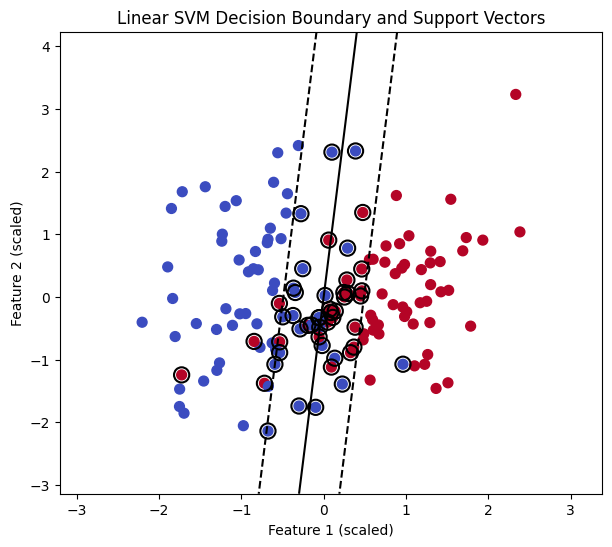

In [9]:
# Step 9: Plot the decision boundary for the linear SVM

# Create a grid of points to plot decision regions
x_min, x_max = X_train_scaled[:,0].min() - 1, X_train_scaled[:,0].max() + 1
y_min, y_max = X_train_scaled[:,1].min() - 1, X_train_scaled[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Compute decision function for each point on the grid
Z = model_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.figure(figsize=(7,6))
plt.contour(xx, yy, Z, colors='k', levels=[-1,0,1], linestyles=['--','-','--'])
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, cmap='coolwarm', s=50)
plt.scatter(model_linear.support_vectors_[:,0], model_linear.support_vectors_[:,1],
            s=120, facecolors='none', edgecolors='k', linewidths=1.5)
plt.title("Linear SVM Decision Boundary and Support Vectors")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


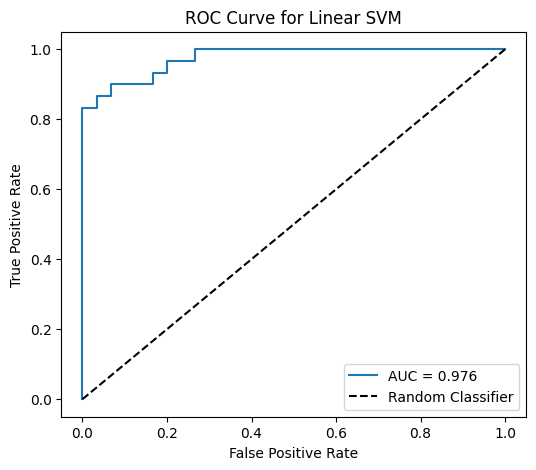

In [10]:
# Step 10: Plot ROC curve and compute AUC (Area Under Curve)
# ROC curve shows trade-off between sensitivity (TPR) and false positives (FPR)

y_score = model_linear.decision_function(X_test_scaled)  # decision values (distance from hyperplane)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--', label="Random Classifier")
plt.title("ROC Curve for Linear SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [11]:
# Step 11: Train a non-linear (RBF) SVM
# This kernel can capture curved boundaries in data

model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_rbf.fit(X_train_scaled, y_train)

# Evaluate on test data
y_pred_rbf = model_rbf.predict(X_test_scaled)
print("Accuracy (RBF Kernel):", accuracy_score(y_test, y_pred_rbf))


Accuracy (RBF Kernel): 0.9166666666666666


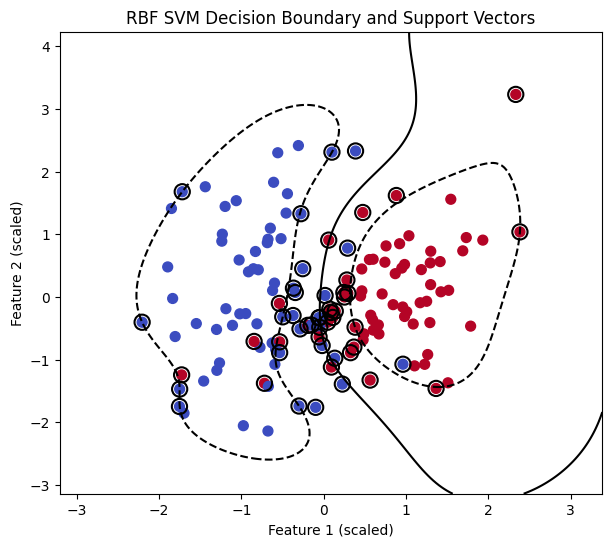

In [12]:
# Step 12: Visualize decision boundary for RBF SVM

Z_rbf = model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contour(xx, yy, Z_rbf, colors='k', levels=[-1,0,1], linestyles=['--','-','--'])
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, cmap='coolwarm', s=50)
plt.scatter(model_rbf.support_vectors_[:,0], model_rbf.support_vectors_[:,1],
            s=120, facecolors='none', edgecolors='k', linewidths=1.5)
plt.title("RBF SVM Decision Boundary and Support Vectors")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


# **SVM classifier**
Breast Cancer Dataset (In-built)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Step 2: Load and prepare the dataset

In [14]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Step 3: Split the dataset into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train an SVM classifier

In [17]:
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

# Step 6: Make predictions

In [18]:
y_pred = svm_classifier.predict(X_test)


# Step 7: Evaluate the model

In [19]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 8: Visualize results using PCA

In [20]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [21]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

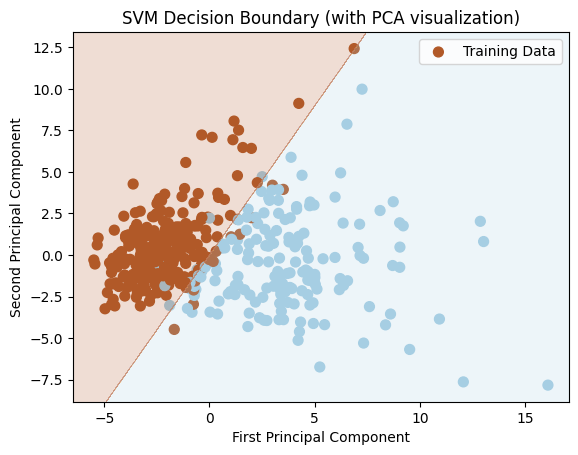

In [22]:
# ===========================================
# Plotting SVM Decision Boundary (with PCA)
# ===========================================

# This assumes:
#   - You already applied PCA on your features -> X_train_pca
#   - You trained an SVM model on PCA-transformed data -> svm_classifier
#   - You have the PCA object -> pca
#   - You have labels -> y_train
#   - numpy as np, matplotlib.pyplot as plt are already imported

# ---------------------------------------------------------
# STEP 1: Plot the training data points in PCA-transformed space
# ---------------------------------------------------------

plt.scatter(
    X_train_pca[:, 0],                 # x-axis = 1st principal component
    X_train_pca[:, 1],                 # y-axis = 2nd principal component
    c=y_train,                         # color points by their class labels
    cmap=plt.cm.Paired,                # use paired color map for class distinction
    s=50,                              # size of each data point
    label="Training Data"              # legend label
)

# Label axes to make the plot informative
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# ---------------------------------------------------------
# STEP 2: Prepare a grid to visualize the decision boundary
# ---------------------------------------------------------

h = 0.02  # step size in the grid (smaller -> smoother boundary but slower to compute)

# Define the range for the grid in both PCA axes
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

# Create a meshgrid (all combinations of x and y values)
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# ---------------------------------------------------------
# STEP 3: Predict class for every point in the grid
# ---------------------------------------------------------

# np.c_ combines xx and yy to create coordinate pairs for prediction
# pca.inverse_transform() converts grid points from PCA space back to original feature space
# (since the SVM was trained on PCA-transformed data, we need to invert before prediction)
Z = svm_classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Reshape the predictions back into the same shape as the grid (for contour plotting)
Z = Z.reshape(xx.shape)

# ---------------------------------------------------------
# STEP 4: Plot the decision boundary and decision regions
# ---------------------------------------------------------

# contourf() fills the regions with different colors according to predicted class
# alpha=0.2 makes it slightly transparent so training points remain visible
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

# ---------------------------------------------------------
# STEP 5: Show the complete plot
# ---------------------------------------------------------

plt.title("SVM Decision Boundary (with PCA visualization)")
plt.legend()
plt.show()


# Step 9: Print results

In [23]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.956140350877193
Confusion Matrix:
 [[41  2]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# **# What is KNN (K-Nearest Neighbors)?**

KNN is a supervised machine learning algorithm used for classification and regression.
It works by comparing new data to the K most similar examples (neighbors) from the training data.
The new data point is assigned to the class that most of its neighbors belong to.

Simple idea: “Show me your neighbors, and I’ll tell you who you are.”

How KNN Works

Choose a value for K (how many neighbors to look at, e.g., K=3 or K=5).

Find the K closest points in the training data to your new data point.

“Closest” means “most similar,” based on distance.

Look at their labels (which class each neighbor belongs to).

Vote!

The class that appears most among those K neighbors becomes the prediction.

**Done.**

That’s it — no equation or heavy training.
KNN just stores the training data and uses it directly when making predictions.

Simple Real-Life Analogy:

Imagine you move into a new neighborhood.
If most of your nearby neighbors have a blue mailbox, you’ll probably paint yours blue too.
That’s KNN — your class depends on your nearest neighbors.

# KNN Key Points

Lazy learner: KNN doesn’t train a model; it just stores data.

K value:

Small K → model is sensitive, may overfit.

Large K → smoother, may miss small patterns.

Feature scaling is important!

Because KNN measures distance — larger values can dominate.

Best for smaller datasets (large datasets make it slow).

# Common Distance Metrics

# Euclidean Distance (default in KNN)

Formula: “Straight-line” distance between two points.

Think of it like using a ruler.

Most common for continuous numeric features.

Use when features are numeric and scaled

# Manhattan Distance

Also called City Block or L1 distance.

Think: If you walk on city blocks (can’t go diagonally), you count total horizontal + vertical steps.

It adds up the absolute differences of each feature.

Use when you want to measure total absolute difference.
More robust when data has outliers or uneven scaling.

# Minkowski Distance

It’s a general form of Euclidean and Manhattan.

You can set a parameter p:

If p=1, it becomes Manhattan.

If p=2, it becomes Euclidean.

So, it’s a flexible metric that can behave like both.

# Example:

# Step 1: Imagine You Move Into a New Neighborhood

You’ve just moved into a new place.
You don’t know what people around you are like —
do they prefer** tea or coffee** in the morning?

You want to guess which group you fit into —
so you look at your neighbors.

# Step 2: How KNN Thinks

The KNN algorithm says:

“Look at the K nearest neighbors to you —
and decide based on what most of them do.”

So you check what your closest neighbors prefer.

# Step 3: Start with K = 1

You only look at your closest neighbor.
That person drinks tea.
So you decide: “People around here drink tea.”

Prediction = Tea drinker

But what if that one neighbor is unusual?
Maybe everyone else drinks coffee, and you just happened to meet the only tea lover nearby.

That’s K too small — it overreacts to one example.
We call that overfitting.

# Step 4: Increase K to 3

Now you check your three nearest neighbors.

Neighbor 1: Tea

Neighbor 2: Coffee

Neighbor 3: Coffee

**Majority = 2 Coffee vs 1 Tea**
**Prediction = Coffee drinker**

This is more stable — you didn’t rely on just one person’s taste.
Now your guess matches what most of your neighbors do.

# Step 5: Try K = 7

Now you ask seven neighbors instead of three.
You discover that four like coffee and three like tea.
Prediction = Coffee again.

Still correct, but you notice that some of those seven neighbors live quite far away — maybe even in another street.
Their habits might not represent your immediate area.

That’s K too large — it becomes too general and may ignore local differences.
We call that underfitting

# Step 6: Finding the “Just Right” K

Just like in real life,
you want enough neighbors to get a fair idea
but not so many that distant people influence your decision.

In practice, we test multiple K values (1, 3, 5, 7, …)
and pick the one that gives the best accuracy on unseen examples.

So, usually:

**Small K (like 1)** → Too specific, memorizes noise.

**Medium K (like 3–7)** → Balanced, good choice.

**Large K (like 20)** → Too general, ignores details.


🔹 K = 1 Neighbors
Accuracy: 1.00 → How often the model is correct overall.
Precision: 1.00 → Of predicted positives, how many were right.
Recall: 1.00 → Of all actual positives, how many we found.
F1-score: 1.00 → Balance between precision and recall.

Confusion Matrix:
[[13  0]
 [ 0  7]]
→ Shows how many were correct or misclassified.



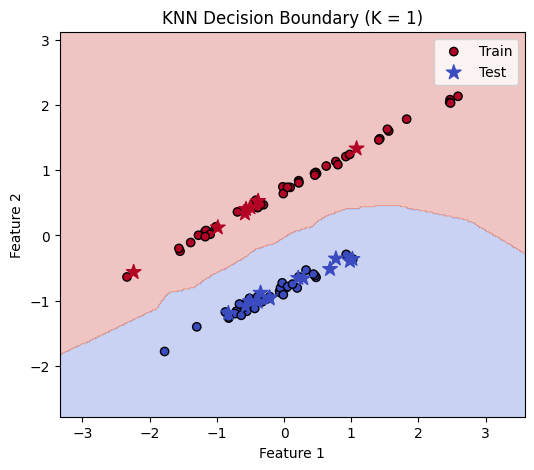


🔹 K = 3 Neighbors
Accuracy: 1.00 → How often the model is correct overall.
Precision: 1.00 → Of predicted positives, how many were right.
Recall: 1.00 → Of all actual positives, how many we found.
F1-score: 1.00 → Balance between precision and recall.

Confusion Matrix:
[[13  0]
 [ 0  7]]
→ Shows how many were correct or misclassified.



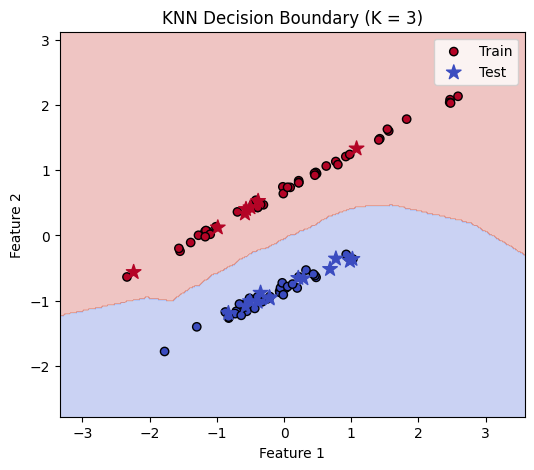


🔹 K = 5 Neighbors
Accuracy: 1.00 → How often the model is correct overall.
Precision: 1.00 → Of predicted positives, how many were right.
Recall: 1.00 → Of all actual positives, how many we found.
F1-score: 1.00 → Balance between precision and recall.

Confusion Matrix:
[[13  0]
 [ 0  7]]
→ Shows how many were correct or misclassified.



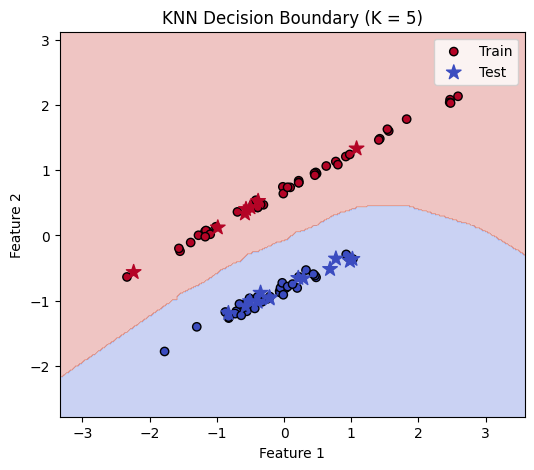

In [24]:
# ==========================================================
# 🧠 Simple K-Nearest Neighbors (KNN) Example for Students
# With step-by-step explanation and metrics
# ==========================================================

# Import the basic libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ----------------------------------------------------------
# Step 1️⃣: Create a simple 2D dataset
# ----------------------------------------------------------
# We create data with two features (so we can plot it)
X, y = make_classification(
    n_samples=100,     # 100 data points
    n_features=2,      # only 2 features for 2D plotting
    n_classes=2,       # two groups (0 and 1)
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# ----------------------------------------------------------
# Step 2️⃣: Split data into training and test sets
# ----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------------------------------
# Step 3️⃣: Scale the features (important for KNN)
# ----------------------------------------------------------
# KNN works by measuring distance, so all features must be on the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------------------------------------
# Step 4️⃣: Define a simple function to train & test KNN
# ----------------------------------------------------------
def knn_example(k):
    print(f"\n🔹 K = {k} Neighbors")

    # Create and train the KNN model
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # ------------------------------------------------------
    # Step 5️⃣: Calculate and explain metrics
    # ------------------------------------------------------
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f} → How often the model is correct overall.")

    prec = precision_score(y_test, y_pred)
    print(f"Precision: {prec:.2f} → Of predicted positives, how many were right.")

    rec = recall_score(y_test, y_pred)
    print(f"Recall: {rec:.2f} → Of all actual positives, how many we found.")

    f1 = f1_score(y_test, y_pred)
    print(f"F1-score: {f1:.2f} → Balance between precision and recall.")

    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    print("→ Shows how many were correct or misclassified.\n")

    # ------------------------------------------------------
    # Step 6️⃣: Visualize the decision boundary
    # ------------------------------------------------------
    h = 0.02  # mesh step size
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Draw the regions and data points
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='*', s=120, label='Test')
    plt.title(f"KNN Decision Boundary (K = {k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


# ----------------------------------------------------------
# Step 7️⃣: Try different K values and compare results
# ----------------------------------------------------------
# K=1 → very sensitive to noise (overfits)
knn_example(1)

# K=3 → balanced
knn_example(3)

# K=5 → smoother (may generalize better)
knn_example(5)


# KNN Classifier
Iris Dataset

# Step 1: Import necessary libraries

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset (Iris dataset in this case)

In [27]:
data = pd.read_csv('/content/iris.csv')

# Step 3: Data Preprocessing

In [ ]:
X = data.drop('species', axis=1)  # Features
y = data['species']  # Target variable

# Step 4: Split the dataset into a training set and a testing set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Function to choose the value of k
def choose_k(X_train, y_train, X_test, y_test, max_k=10):
    k_values = list(range(1, max_k+1))
    accuracy_values = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)

    # Visualize the accuracy for different k values
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
    plt.title('Accuracy vs. Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    best_k = k_values[accuracy_values.index(max(accuracy_values))]
    return best_k

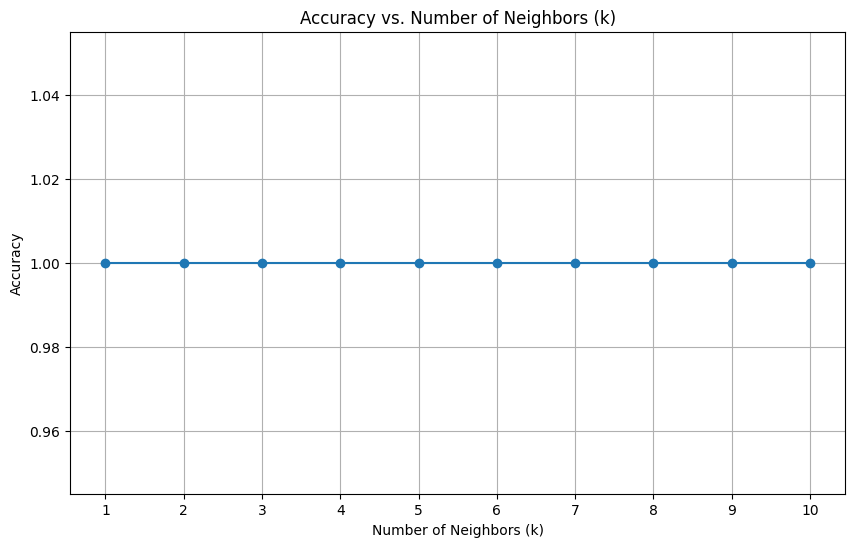

Best k: 1


In [30]:
# Choose the best k value
best_k = choose_k(X_train, y_train, X_test, y_test)
print("Best k:", best_k)

# Step 5: Create and train the KNN model with the best k

In [32]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Step 6: Make predictions

In [33]:
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Step 8: Visualize the results (pairplot for pair-wise feature comparisons)

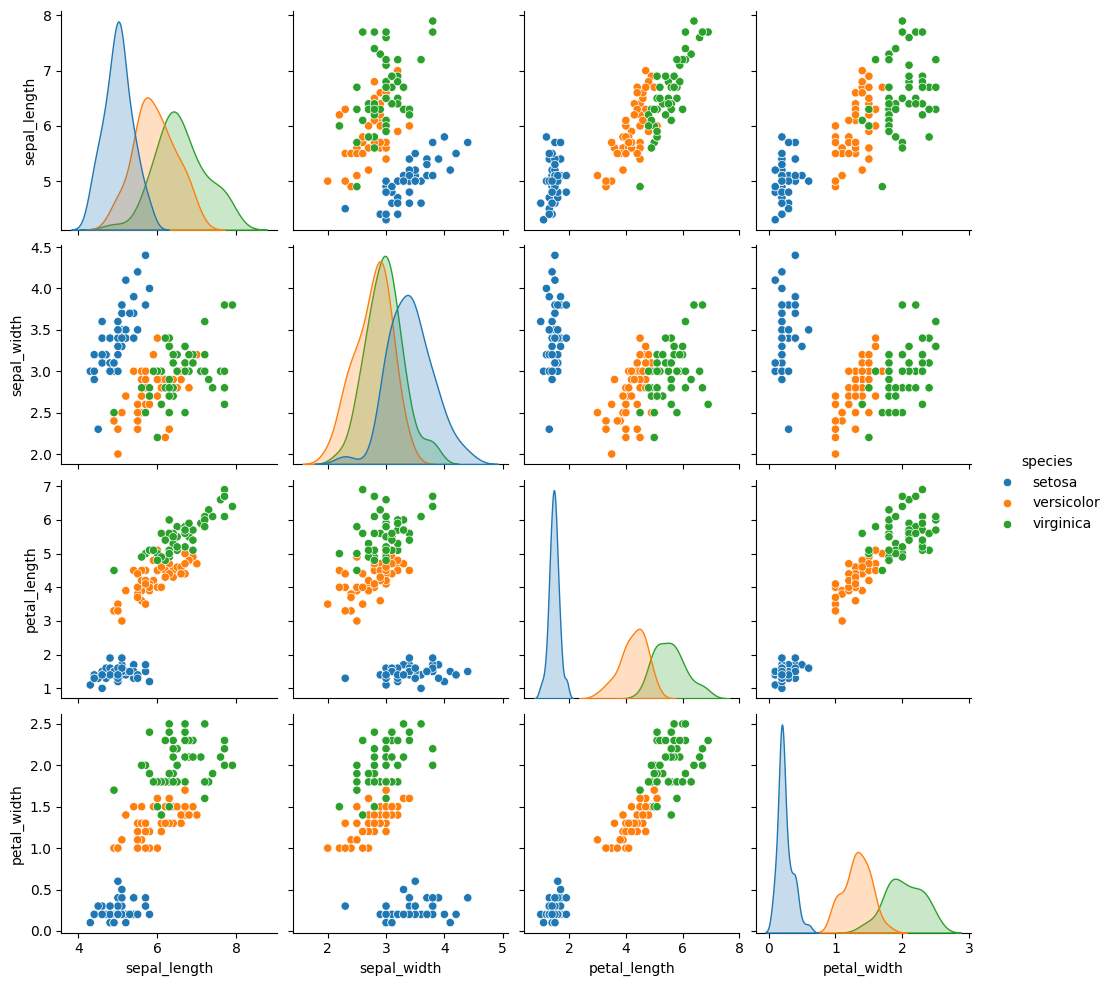

In [35]:
sns.pairplot(data, hue='species')
plt.show()


# DAY 2

# **ARIMA**
ARIMA is a time series forecasting model.
It’s used when you have data that changes over time — like sales each month, daily temperature, or stock prices — and you want to predict the future based on the past.

The name stands for:
AR → Auto-Regressive
I → Integrated
MA → Moving Average

Each of those words tells you what kind of relationships the model tries to capture in your data.

**The “AR” part (Auto-Regressive)**

This means the model looks at past values of the series to predict the next one.

For example, if you’re trying to predict today’s temperature, maybe it’s usually similar to yesterday’s temperature.

So if you say “AR(1)” — that means the current value depends on the previous value.
“AR(2)” means it depends on the last two values, and so on.

You can think of it like saying:

“What’s happening today is influenced by what happened recently.”

# The “I” part (Integrated)

This is about making the data stationary.

A time series is stationary if its pattern doesn’t change over time — the mean and variance stay roughly constant.
But real-world data (like sales or temperature) often has trends — it goes up or down over time.

The “I” part fixes this by differencing the data.

Differencing means you subtract the previous value from the current one:

You might need to do this once, twice, or not at all.
The number of times you do it is called d.
So:

d = 0 means data is already stationary

d = 1 means you took one difference

d = 2 means two differences

# The “MA” part (Moving Average)

This part says: maybe the next value isn’t just about past values, but also about past errors.

Errors are the differences between what the model predicted and what actually happened.

For example, if the model predicted too low yesterday, maybe it’ll adjust upward today.

So the MA part uses past forecast errors to improve predictions.

Putting it all together — ARIMA(p, d, q)

Now that we know the pieces:

p is how many past values we look at (AR part)

d is how many times we difference the data (I part)

q is how many past errors we look at (MA part)

So an ARIMA(1, 1, 1) model means:

We take one difference (remove trend once)

We use one previous value

We use one previous error

# Why we do this

The whole goal is to model the structure of the time series so we can predict future values.

The AR part captures momentum (how past values influence the future).
The I part removes trend (so predictions don’t drift too far).
The MA part captures shock effects (like sudden changes or corrections).

When you combine them, you get a powerful model that can handle many kinds of patterns in time series data.

# Imagine you run a small shop, and you record your monthly sales.

You notice:

Sales are usually higher than last month by a small amount → trend (needs differencing).

Sometimes, when you sold much less one month, the next month sales bounce back → that’s captured by AR and MA parts.

You fit an ARIMA model to that data — say ARIMA(1, 1, 1).
Now you can forecast future months, and the model will account for:

The recent trend (from the “I” part),

The way sales depend on previous months (from “AR”),

And how random shocks behave (from “MA”).

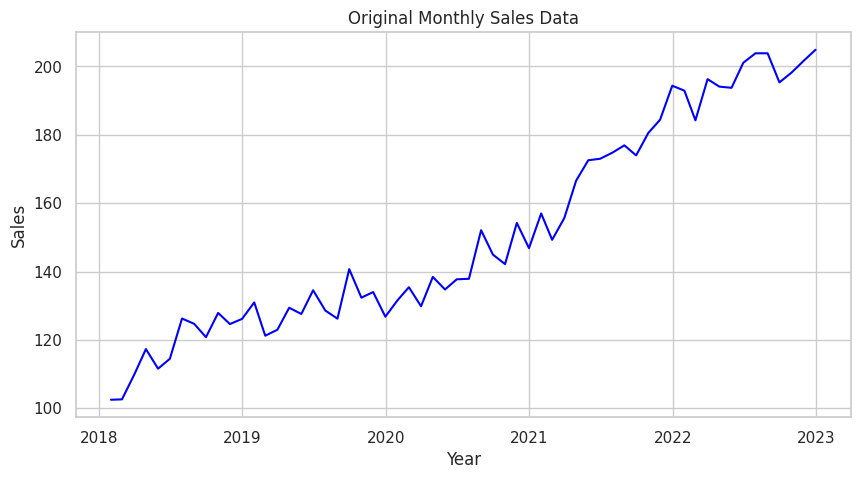

ADF Statistic: 0.030231172530373444
p-value: 0.9609619121406641
⚠️ The series is NOT stationary — we need differencing.


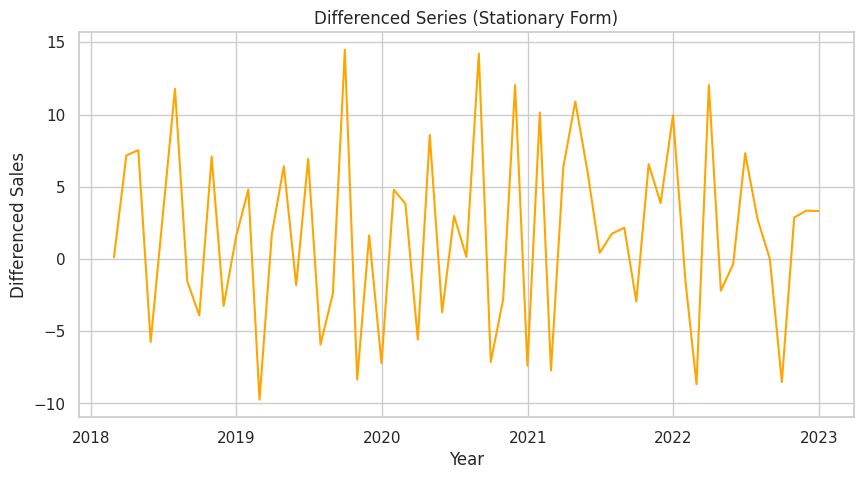


After Differencing:
ADF Statistic: -8.640288857101092
p-value: 5.449304627967394e-14
✅ Now the series is stationary.


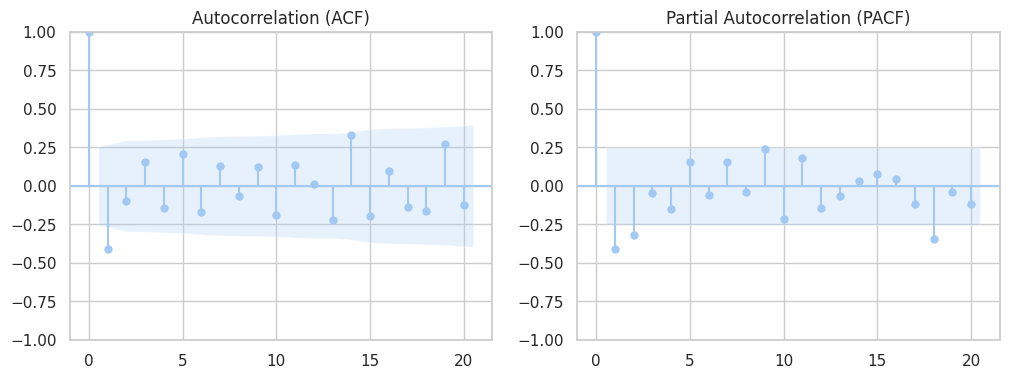

                               SARIMAX Results                                
Dep. Variable:          Monthly Sales   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -191.044
Date:                Sun, 12 Oct 2025   AIC                            388.088
Time:                        05:36:44   BIC                            394.320
Sample:                    01-31-2018   HQIC                           390.521
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1480      0.492     -0.301      0.764      -1.113       0.817
ma.L1         -0.1895      0.473     -0.400      0.689      -1.117       0.738
sigma2        37.9490      7.771      4.883      0.0

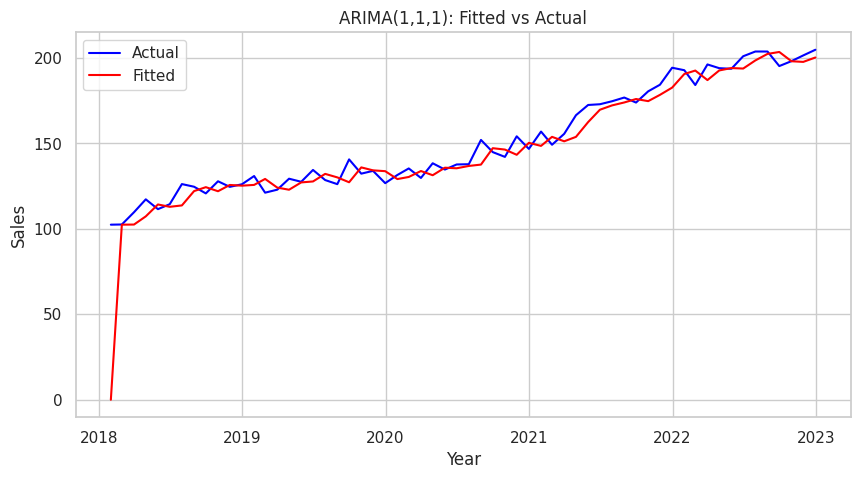

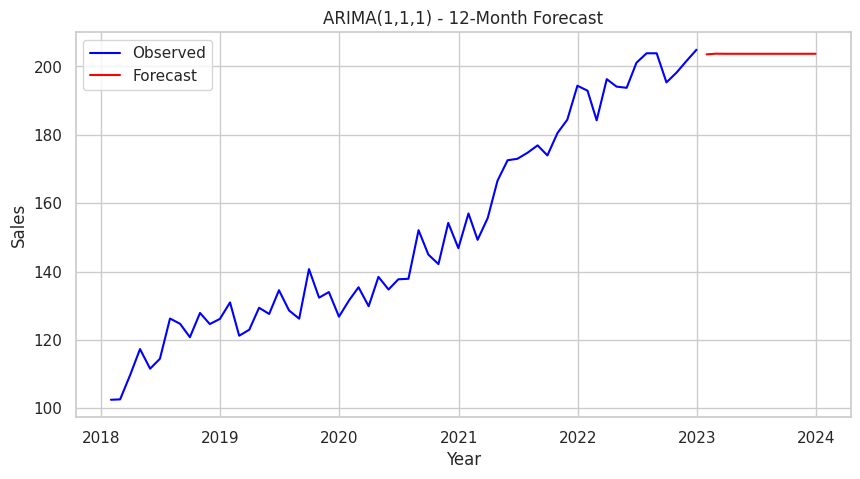

Root Mean Squared Error (RMSE): 8.32


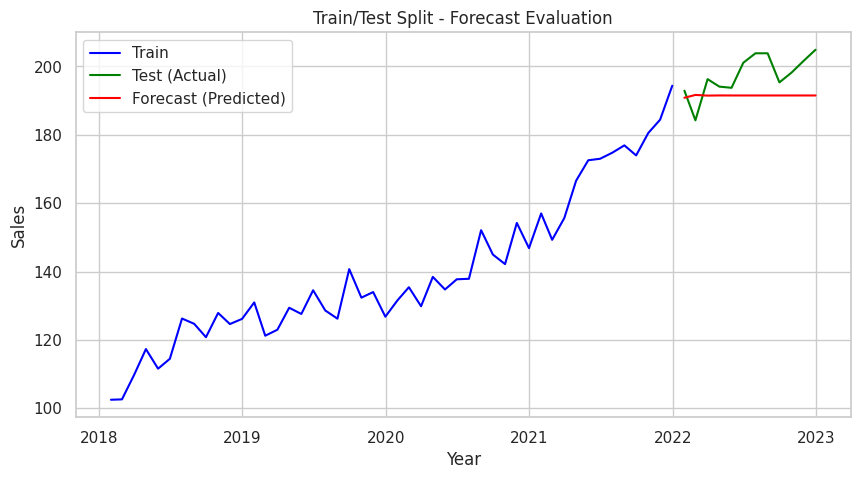

In [36]:
# ============================================================
# 📘 ARIMA (AutoRegressive Integrated Moving Average) Tutorial
# Learn step by step, with detailed reasoning for each step.
# ============================================================

# --- Step 1: Import required libraries ----------------------
# These libraries are used for data handling, visualization,
# statistical testing, and building the ARIMA model.

import numpy as np                     # for numerical operations
import pandas as pd                    # for handling time series data
import matplotlib.pyplot as plt        # for plotting
import seaborn as sns                  # for prettier plots
from statsmodels.tsa.stattools import adfuller     # test for stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # visualize lags
from statsmodels.tsa.arima.model import ARIMA       # ARIMA model
from sklearn.metrics import mean_squared_error       # to evaluate accuracy
import warnings
warnings.filterwarnings("ignore")       # suppress unnecessary warnings

sns.set(style="whitegrid", palette="pastel")  # set a nice plot style


# --- Step 2: Create synthetic time series data ---------------
# We'll simulate monthly sales data that has:
#  - an upward trend
#  - a bit of seasonality (sin wave)
#  - and random noise
# This helps us understand ARIMA in a controlled example.

np.random.seed(42)  # ensures results are reproducible

# Generate a monthly date index over 5 years
time_index = pd.date_range(start='2018-01-01', periods=60, freq='M')

# Create components of our fake sales data
trend = np.linspace(100, 200, 60)                     # steady upward trend
seasonal = 10 * np.sin(np.linspace(0, 3 * np.pi, 60)) # repeating seasonal cycle
noise = np.random.normal(0, 5, 60)                    # random fluctuations

# Combine components to create the final sales series
sales = trend + seasonal + noise

# Store as a pandas Series (easier for ARIMA)
data = pd.Series(sales, index=time_index)
data.name = "Monthly Sales"


# --- Step 3: Visualize the raw data ---------------------------
# We plot to visually confirm that:
#  - the data trends upward (non-stationary)
#  - there is visible seasonality
#  - noise is present

plt.figure(figsize=(10, 5))
plt.plot(data, color='blue')
plt.title("Original Monthly Sales Data")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()


# --- Step 4: Check for stationarity ----------------------------
# ARIMA models require the data to be *stationary*,
# meaning mean and variance don't change over time.
# We'll use the Augmented Dickey-Fuller (ADF) test for that.

result = adfuller(data)  # run ADF test
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# A low p-value (< 0.05) means data IS stationary.
# A high p-value (> 0.05) means data is NOT stationary (has trend or seasonality).

if result[1] < 0.05:
    print("✅ The series is stationary.")
else:
    print("⚠️ The series is NOT stationary — we need differencing.")


# --- Step 5: Difference the data to remove trend ---------------
# Differencing means subtracting each value from its previous one:
#   diff_t = value_t - value_(t-1)
# This removes linear trends and stabilizes the mean.

data_diff = data.diff().dropna()  # drop the first NaN created by differencing

# Let's visualize the differenced series
plt.figure(figsize=(10, 5))
plt.plot(data_diff, color='orange')
plt.title("Differenced Series (Stationary Form)")
plt.xlabel("Year")
plt.ylabel("Differenced Sales")
plt.show()

# Test again to confirm stationarity after differencing
result = adfuller(data_diff)
print("\nAfter Differencing:")
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("✅ Now the series is stationary.")
else:
    print("⚠️ Still not stationary; might need another difference.")


# --- Step 6: Examine ACF and PACF plots ------------------------
# ACF (Autocorrelation Function) shows correlation with *past values*.
# PACF (Partial ACF) shows correlation with *past values after removing
# the effects of shorter lags*.
# These plots help us choose p (AR part) and q (MA part).

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data_diff, ax=ax[0], lags=20)
plot_pacf(data_diff, ax=ax[1], lags=20)
ax[0].set_title("Autocorrelation (ACF)")
ax[1].set_title("Partial Autocorrelation (PACF)")
plt.show()

# Insights:
#  - Where ACF cuts off → suggests value of q (MA part)
#  - Where PACF cuts off → suggests value of p (AR part)
# We'll start with (p,d,q) = (1,1,1) as a simple baseline.


# --- Step 7: Build the ARIMA model -----------------------------
# ARIMA(p, d, q)
#   p = number of lag observations (AR part)
#   d = degree of differencing (I part)
#   q = size of moving average window (MA part)

model = ARIMA(data, order=(1, 1, 1))  # using (1,1,1) based on above reasoning
fit = model.fit()  # estimate parameters using maximum likelihood
print(fit.summary())  # show coefficients and diagnostics


# --- Step 8: Plot fitted vs actual values ----------------------
# The fittedvalues represent how the model reconstructs past data
# (using AR and MA parts). If it's close to the real series,
# the model captures the structure well.

plt.figure(figsize=(10, 5))
plt.plot(data, label='Actual', color='blue')
plt.plot(fit.fittedvalues, label='Fitted', color='red')
plt.title("ARIMA(1,1,1): Fitted vs Actual")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()


# --- Step 9: Forecast into the future ---------------------------
# Let's forecast the next 12 months (1 year ahead).
# ARIMA forecasts by projecting the pattern it learned forward.

forecast_steps = 12
forecast = fit.forecast(steps=forecast_steps)  # predict 12 future points

# Create matching future date index for plotting
forecast_index = pd.date_range(start=data.index[-1] + pd.offsets.MonthEnd(1),
                               periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot observed data + forecast together
plt.figure(figsize=(10, 5))
plt.plot(data, label='Observed', color='blue')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title("ARIMA(1,1,1) - 12-Month Forecast")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Insight:
# The forecast line continues the same trend pattern,
# adjusting slightly for the AR and MA influences.


# --- Step 10: Evaluate model performance -----------------------
# We'll use a simple train-test split:
#  - Train on all data except last 12 months
#  - Test on the last 12 months
# We'll compare predicted vs actual using RMSE (lower = better).

train = data[:-12]
test = data[-12:]

# Fit ARIMA on training data
model_eval = ARIMA(train, order=(1,1,1)).fit()

# Forecast on the test horizon
pred = model_eval.forecast(steps=12)

# Compute Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(test, pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot train, test, and predictions
plt.figure(figsize=(10,5))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test (Actual)', color='green')
plt.plot(test.index, pred, label='Forecast (Predicted)', color='red')
plt.title("Train/Test Split - Forecast Evaluation")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Insights:
#  - If red (forecast) closely follows green (actual), the model performs well.
#  - RMSE gives a numeric measure of average prediction error.
#  - You can tune (p,d,q) further for improvement.
# ============================================================
# ✅ Summary:
#  1️⃣ Created time series with trend + noise
#  2️⃣ Made it stationary using differencing
#  3️⃣ Used ACF/PACF to guide p & q
#  4️⃣ Fit ARIMA(1,1,1)
#  5️⃣ Forecasted and evaluated results visually and numerically
# ============================================================


# SARIMA stands for:

Seasonal AutoRegressive Integrated Moving Average

It’s written as:

SARIMA(p,d,q)(P,D,Q,s)

It’s basically ARIMA + seasonality.

ARIMA handles trends and short-term relationships.
SARIMA adds extra terms that handle repeating patterns (like monthly, quarterly, or yearly cycles).

If your sales rise every December and drop every January — that’s seasonality.
ARIMA can’t handle that well on its own.
SARIMA explicitly models that repeating pattern.

The parameters explained

SARIMA has two groups of parameters:

(a) Non-seasonal parameters — same as ARIMA:

p → number of autoregressive (AR) terms

d → number of differences (to remove trend)

q → number of moving average (MA) terms

(b) Seasonal parameters — the new ones:

P → seasonal autoregressive order

D → seasonal differencing order

Q → seasonal moving average order

s → length of one season (e.g., 12 for monthly data with yearly seasonality)

So s tells the model how often the pattern repeats.

Example:

Monthly data → s = 12

Quarterly data → s = 4

Daily data (weekly pattern) → s = 7

SARIMA(p,d,q)(P,D,Q,s)

So it’s really like two ARIMAs working together:

One for regular patterns (short-term)

One for seasonal cycles (long-term)

When to use SARIMA instead of ARIMA

Use ARIMA when:

There’s trend but no seasonality.

Use SARIMA when:

You clearly see repeating patterns (e.g., monthly cycles in sales, yearly climate, etc.).

Example Intuition Before Code

Let’s say we have monthly airline passenger data.
We notice two things:

The number of passengers grows over time (trend).

Each year has peaks in summer and drops in winter (seasonality).

If we used just ARIMA, it would miss that repeating pattern.
SARIMA, on the other hand, adds special terms that say:

“Hey, what happens this July probably looks a lot like last July.”

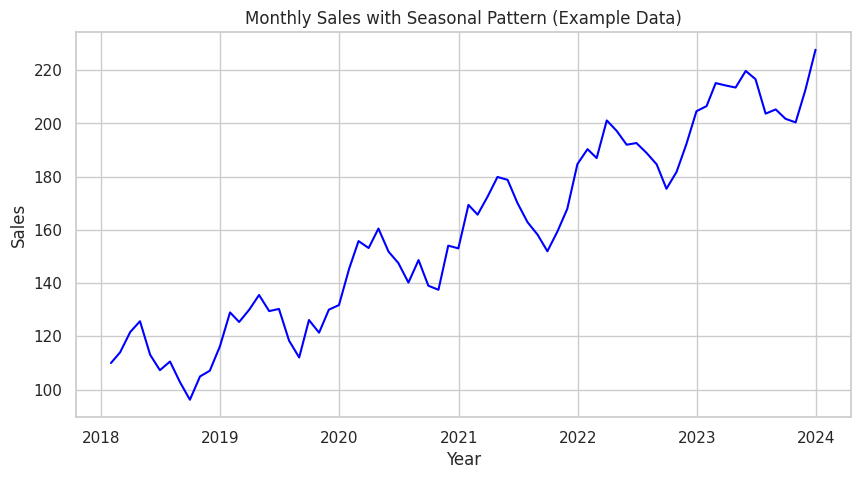

ADF Statistic: 1.6429363876688023
p-value: 0.997980839157835
⚠️ Series is NOT stationary — needs differencing.


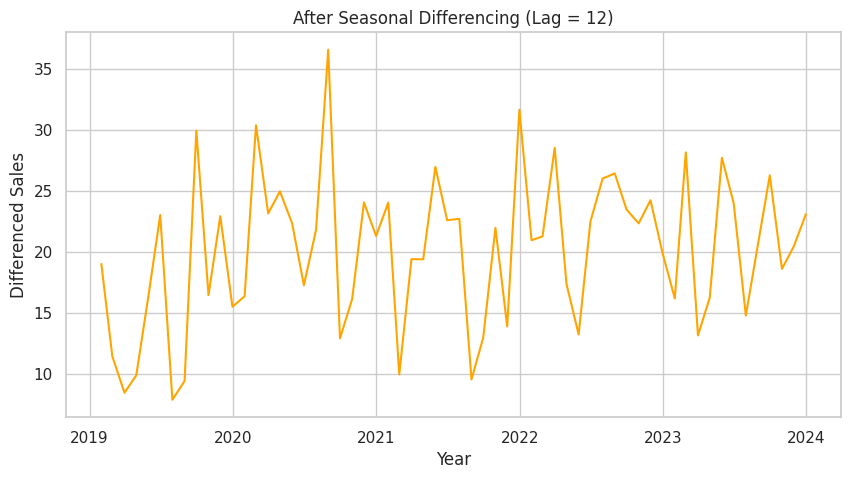


After Seasonal Differencing:
ADF Statistic: -3.9811403253818716
p-value: 0.001512550262166438
✅ Now the series is stationary.
                                     SARIMAX Results                                      
Dep. Variable:           Monthly Sales (Seasonal)   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -134.526
Date:                            Sun, 12 Oct 2025   AIC                            279.052
Time:                                    05:36:58   BIC                            288.085
Sample:                                01-31-2018   HQIC                           282.419
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

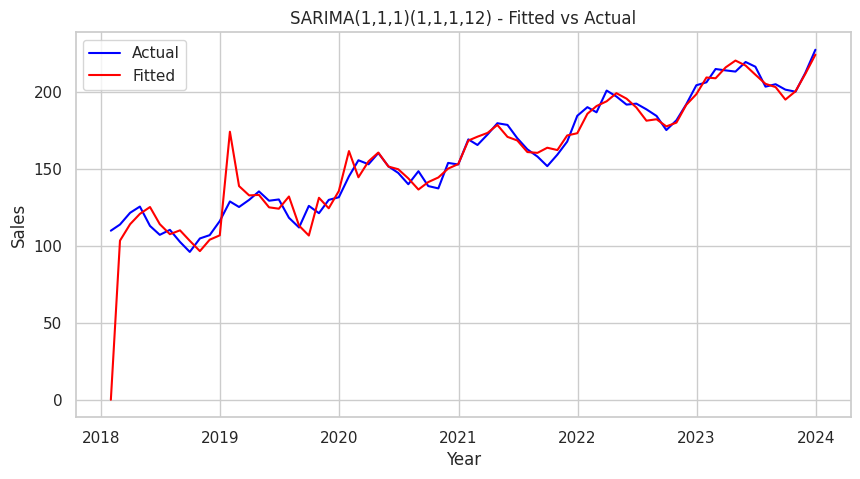

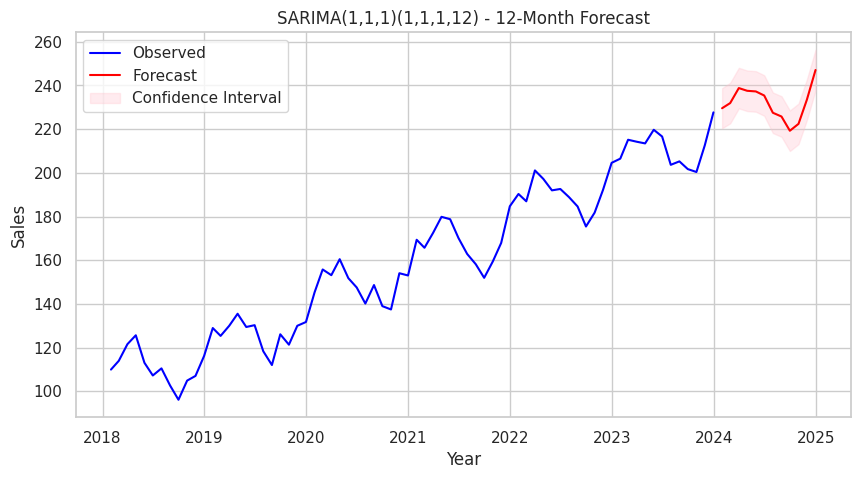

Root Mean Squared Error (RMSE): 4.46


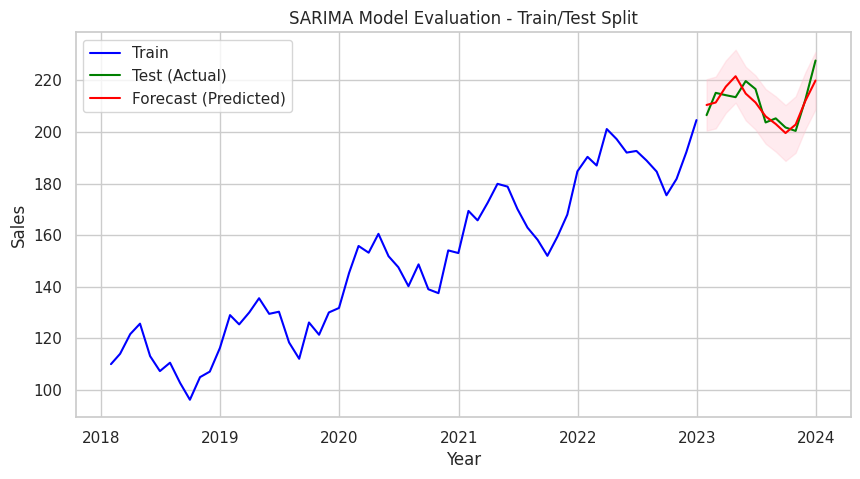

In [37]:
# ===================================================================
# 📘 SARIMA (Seasonal ARIMA) Tutorial
# Continuation of the ARIMA walkthrough
# Now we handle seasonality explicitly!
# ===================================================================

# --- Step 1: Import the necessary modules for SARIMA ------------
# We continue with the same libraries, adding SARIMAX (which includes SARIMA).

from statsmodels.tsa.statespace.sarimax import SARIMAX

# We'll use the same synthetic dataset from the ARIMA tutorial (`data` Series).
# However, for SARIMA, we’ll slightly modify it to include clearer seasonality.

# --- Step 2: Create a more seasonal dataset ---------------------
# We'll make sales rise and fall in a repeating 12-month pattern (strong seasonality).
np.random.seed(42)
time_index = pd.date_range(start='2018-01-01', periods=72, freq='M')  # 6 years of monthly data
trend = np.linspace(100, 220, 72)             # upward long-term trend
seasonal = 15 * np.sin(2 * np.pi * time_index.month / 12)  # repeating yearly pattern
noise = np.random.normal(0, 5, 72)            # random fluctuations
sales = trend + seasonal + noise              # combine trend + seasonality + noise

data_s = pd.Series(sales, index=time_index)
data_s.name = "Monthly Sales (Seasonal)"


# --- Step 3: Visualize the data to see seasonality ---------------
plt.figure(figsize=(10,5))
plt.plot(data_s, color='blue')
plt.title("Monthly Sales with Seasonal Pattern (Example Data)")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

# 🔍 Insight:
# Notice the clear up-and-down pattern every 12 months.
# This repeating cycle is what SARIMA is designed to capture.


# --- Step 4: Check for stationarity -------------------------------
# We again use the Augmented Dickey-Fuller test to check if the series is stationary.
result = adfuller(data_s)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("✅ Series is stationary (no differencing needed).")
else:
    print("⚠️ Series is NOT stationary — needs differencing.")


# --- Step 5: Apply seasonal differencing if needed ----------------
# To remove both trend and seasonality, we difference by lag 12 (one year)
# This removes yearly cycles.
data_s_diff = data_s.diff(12).dropna()

plt.figure(figsize=(10,5))
plt.plot(data_s_diff, color='orange')
plt.title("After Seasonal Differencing (Lag = 12)")
plt.xlabel("Year")
plt.ylabel("Differenced Sales")
plt.show()

# Check again for stationarity after seasonal differencing
result = adfuller(data_s_diff)
print("\nAfter Seasonal Differencing:")
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("✅ Now the series is stationary.")
else:
    print("⚠️ Still not stationary; could require another difference.")


# --- Step 6: Build a SARIMA model -------------------------------
# SARIMA has two parts:
#  - (p,d,q): non-seasonal ARIMA part
#  - (P,D,Q,s): seasonal ARIMA part
# Here, we’ll assume monthly data with yearly seasonality (s=12)
# and start with a simple model: (p,d,q)(P,D,Q,12) = (1,1,1)(1,1,1,12)

model_sarima = SARIMAX(
    data_s,
    order=(1,1,1),             # non-seasonal part (like ARIMA)
    seasonal_order=(1,1,1,12), # seasonal part (P,D,Q,s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

fit_sarima = model_sarima.fit(disp=False)
print(fit_sarima.summary())

# 🔍 Insight:
# - The coefficients show how much past values and errors affect current predictions.
# - The seasonal terms capture the repeating annual pattern.


# --- Step 7: Plot the fitted vs actual data ---------------------
plt.figure(figsize=(10,5))
plt.plot(data_s, label="Actual", color="blue")
plt.plot(fit_sarima.fittedvalues, label="Fitted", color="red")
plt.title("SARIMA(1,1,1)(1,1,1,12) - Fitted vs Actual")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()

# 🔍 Insight:
# The red fitted line should follow the blue actual line closely,
# including the seasonal ups and downs.
# This shows the model is learning both trend and seasonality.


# --- Step 8: Forecast into the future ----------------------------
# Let’s forecast the next 12 months (one full seasonal cycle ahead).
forecast_steps = 12
forecast = fit_sarima.get_forecast(steps=forecast_steps)

# Extract predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create a new date index for forecast period
forecast_index = pd.date_range(
    start=data_s.index[-1] + pd.offsets.MonthEnd(1),
    periods=forecast_steps, freq='M'
)
forecast_series = pd.Series(forecast_mean.values, index=forecast_index)

# Plot original + forecast
plt.figure(figsize=(10,5))
plt.plot(data_s, label='Observed', color='blue')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(
    forecast_index,
    conf_int.iloc[:,0],
    conf_int.iloc[:,1],
    color='pink', alpha=0.3, label='Confidence Interval'
)
plt.title("SARIMA(1,1,1)(1,1,1,12) - 12-Month Forecast")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()

# 🔍 Insight:
# The red forecast line continues the seasonal wave into the future,
# while the pink band shows uncertainty increasing over time.


# --- Step 9: Evaluate model accuracy -----------------------------
# Split data into train/test to check predictive power
train_s = data_s[:-12]
test_s = data_s[-12:]

# Fit SARIMA on training data only
model_eval_sarima = SARIMAX(train_s, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

# Forecast next 12 months (the test period)
pred_s = model_eval_sarima.get_forecast(steps=12)
pred_mean_s = pred_s.predicted_mean
conf_s = pred_s.conf_int()

# Compute RMSE (Root Mean Squared Error)
rmse_s = np.sqrt(mean_squared_error(test_s, pred_mean_s))
print(f"Root Mean Squared Error (RMSE): {rmse_s:.2f}")

# Plot training, test, and forecast
plt.figure(figsize=(10,5))
plt.plot(train_s, label="Train", color="blue")
plt.plot(test_s, label="Test (Actual)", color="green")
plt.plot(test_s.index, pred_mean_s, label="Forecast (Predicted)", color="red")
plt.fill_between(test_s.index, conf_s.iloc[:,0], conf_s.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMA Model Evaluation - Train/Test Split")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()

# 🔍 Insight:
# - If the red forecast line aligns closely with the green test line, SARIMA is performing well.
# - RMSE quantifies how close the predictions are on average.


# --- Step 10: Final Summary --------------------------------------
# ✅ What we did:
#  1️⃣ Created data with strong seasonal pattern
#  2️⃣ Differenced it to remove seasonality
#  3️⃣ Built SARIMA(p,d,q)(P,D,Q,s) model
#  4️⃣ Fitted and visualized the results
#  5️⃣ Forecasted and evaluated on a test set
#  6️⃣ Saw how SARIMA captures both trend and seasonality together
# ===================================================================


# RMSE (Root Mean Squared Error)

What it is: Imagine you’re predicting temperatures for the week. RMSE tells you, on average, how far off your predictions are — but it cares more about the big mistakes.

Example:
Actual temperatures: 30°C, 25°C, 20°C
Predicted: 29°C, 27°C, 21°C

Errors:

Day 1: 1°C off

Day 2: 2°C off

Day 3: 1°C off

RMSE will give a value slightly higher than the average error because it gives more weight to the larger mistake (Day 2). So RMSE might be around 1.2°C.

Why it matters: Good when big errors are costly (like predicting demand for power plants or flood levels).

MAE (Mean Absolute Error)

What it is: Average of how far predictions are from reality — treats all errors equally.

Example:
Using the same temperatures:
Errors: 1°C, 2°C, 1°C → average error is 1.33°C.

Why it matters: Simple to understand. If you want a clear “average error” without overemphasizing outliers, MAE is good.

MAPE (Mean Absolute Percentage Error)

What it is: Tells you error as a percentage of actual value, so it’s easier to compare across different scales.

Example:
Actual sales: 100, 200, 50
Predicted: 90, 210, 55

Errors:

Day 1: 10 off → 10% error

Day 2: 10 off → 5% error

Day 3: 5 off → 10% error

MAPE = average of these percentages = 8.3%.

Why it matters: Gives a sense of “relative error,” useful if numbers vary in scale. But it fails if actual value is zero (division problem).

AIC & BIC

What they are: Tools to decide which model is better — not about error size, but about balancing fit vs complexity.

Example:
Two models for predicting sales:

Model A has more variables and predicts very well.

Model B has fewer variables, slightly less accurate.

AIC and BIC say: “Model B is better if the improvement from Model A isn’t worth the extra complexity.” Lower AIC/BIC means better balance.

Why it matters: Prevents overfitting — where a model works perfectly on old data but fails on new data.

R-squared (R²)

What it is: Tells you how much of the variation in your data the model explains.

Example:
R² = 0.85 → the model explains 85% of the changes in the data, the rest is random or unknown.

Why it matters: Gives a quick check of “how good” your model is overall.

Ljung-Box Test

What it is: Checks whether the errors from your model are random or have patterns.

Example:
You make a weather prediction model. Ljung-Box test says errors are NOT random → means your model missed some pattern (maybe seasonality). You should improve the model.

Why it matters: Ensures you’re not ignoring leftover patterns in your predictions.

Summary:

Use RMSE for heavy penalty on large errors.

Use MAE for a simple average error measure.

Use MAPE to compare errors in percentage.

Use AIC/BIC to choose between models.

Use R² to see overall model fit.

Use Ljung-Box to check residual randomness.

# The Detective Story: “The Mystery of the Vanishing Cupcakes”

# Step 1 — The Case Appears

In the bustling town of Sweetville, bakery owner Mrs. Crumble is distraught. Her bakery reports that cupcakes have been disappearing every month — sometimes small thefts, sometimes massive heists.

The mayor calls in Detective Metrics, a brilliant detective who specializes in prediction crimes. Detective Metrics assembles two teams:

Team ARIMA (“Simple Sleuth”) → focuses on trends and noise.

Team SARIMA (“Seasonal Sleuth”) → focuses on trends, noise, and seasonal patterns.

Their mission: predict cupcake thefts so they can set a trap and catch the thief.

# Step 2 — Building the Models in Detail

Scene: Detectives gather in Sweetville HQ with stacks of monthly theft reports going back several years. They need to choose the best model.

ARIMA — “Simple Sleuth” Approach

Detective Simple Sleuth says:
"I only care about the general trend of theft. I’ll ignore seasonal patterns for now — those can be noise."

How ARIMA works:
ARIMA uses three parts:

AR (AutoRegressive) → uses past theft numbers.

I (Integrated) → removes trends in the data by differencing.

MA (Moving Average) → uses past prediction errors to adjust.

Example:
Past thefts (monthly):
20, 22, 18, 25, 23, 24, 30, 28, 27, 35, 33, 38

ARIMA will examine trends and noise. It might decide:

Look at last 2 months (p=2)

Remove trend once (d=1)

Use last month’s error (q=1)

The result: ARIMA builds a model that forecasts future theft without accounting for seasonal spikes like weekends or holidays.

SARIMA — “Seasonal Sleuth” Approach

Detective Seasonal Sleuth says:
"Wait — these thefts happen in patterns. Weekends and holidays are hot spots. We need seasonality in our model."

How SARIMA works:
SARIMA adds seasonal parameters to ARIMA:

P, D, Q → seasonal equivalents of ARIMA’s p, d, q.

m → seasonal period (e.g., 12 for monthly seasonality).

Example:
Past monthly thefts:
20, 22, 18, 25, 23, 24, 30, 28, 27, 35, 33, 38

SARIMA sees a seasonal pattern: theft spikes every December and weekends.
It chooses: P=1, D=1, Q=1, m=12.

This means SARIMA models:

Trend → gradual changes over months.

Seasonality → predictable theft peaks.

SARIMA is like a detective who uses crime cycle maps, knowing when thefts spike every year.

Choosing Parameters

Both detectives:

Look at autocorrelation plots (ACF/PACF).

Test different parameters.

Use AIC/BIC to select the best-fit model with minimal complexity.

SARIMA has more parameters → more tuning time, but greater accuracy potential.

Step 3 — Making Predictions

Both detectives forecast thefts for the next month:

ARIMA: [32, 34, 31, 35] cupcakes stolen per weekend day.

SARIMA: [30, 38, 29, 40] cupcakes stolen per weekend day.

Mayor says: “Which one is right?” → Enter metrics.

Step 4 — Metric Investigation

They compare predictions with actual thefts: [31, 39, 30, 42].

RMSE — The Big Mistake Detective

RMSE penalizes big errors heavily.

ARIMA → errors [1, 5, 1, 7] → RMSE ≈ 4.1 cupcakes.

SARIMA → errors [1, 1, 1, 2] → RMSE ≈ 1.9 cupcakes.

Lesson: SARIMA better catches large theft spikes.

MAE — The Average Error Detective

MAE is a simple average error measure.

ARIMA MAE = 3.5 cupcakes

SARIMA MAE = 1.5 cupcakes

SARIMA wins again.

MAPE — The Percentage Detective

MAPE expresses error as a percentage.

ARIMA average error = 13%

SARIMA average error = 6%

SARIMA’s proportional accuracy is far better.

AIC & BIC — The Complexity Detectives

They measure model fit vs complexity.

ARIMA: AIC = 150, BIC = 160

SARIMA: AIC = 120, BIC = 130

Lower is better → SARIMA wins.

R-squared — The Variance Detective

ARIMA explains 70% of theft variation.

SARIMA explains 90% of variation.

SARIMA explains seasonal theft patterns much better.

Ljung-Box Test — The Randomness Detective

Checks if leftover errors have patterns.

ARIMA p-value = 0.02 → residuals have patterns → missed seasonality.

SARIMA p-value = 0.40 → residuals random → model captured patterns well.

# Step 5 — Choosing the Detective

Mayor compares results:

RMSE, MAE, MAPE → SARIMA more accurate.

AIC/BIC → SARIMA balances fit and complexity.

R² → SARIMA explains more variation.

Ljung-Box → SARIMA residuals are random.

Verdict: SARIMA is the winner.
They set a trap based on SARIMA’s prediction and catch the thief during the predicted weekend spike. Sweetville celebrates.

Step 6 — Metric Usage Summary for ARIMA & SARIMA

For ARIMA:

RMSE & MAE → check accuracy.

MAPE → compare errors proportionally.

AIC/BIC → choose best parameters.

R² → overall fit check.

Ljung-Box → check for leftover autocorrelation.

For SARIMA:

RMSE & MAE → check accuracy including seasonality.

MAPE → proportional accuracy.

AIC/BIC → avoid overfitting despite extra parameters.

R² → seasonal variation explanation.

Ljung-Box → ensure all seasonality and trend captured.

# Final Detective Lesson:
ARIMA works for simple trends, SARIMA works when seasonality exists.
Metrics RMSE, MAE, MAPE, AIC/BIC, R², and Ljung-Box are the detectives’ tools to decide which model solves the case best.

In Sweetville, SARIMA cracked the case because it caught the seasonal theft pattern.

# AIC (Akaike Information Criterion)

AIC is a measure of how well your model fits the data, penalized for complexity.
It tries to balance accuracy and simplicity.

Lower AIC → better model

Penalizes models with more parameters (to avoid overfitting)

In simple words:
AIC says:

"Choose a model that explains the data well, but is not unnecessarily complex."

Why we use it:
If you just minimize error without penalty, you might choose a model with too many parameters, which will perform badly on new data. AIC helps prevent that.

# 2. BIC (Bayesian Information Criterion)

BIC is similar to AIC but penalizes complexity more strongly, especially for larger datasets.

Lower BIC → better model

Stronger penalty for adding parameters compared to AIC

Why we use it:
BIC is stricter — it tends to favor simpler models more than AIC does, which can be useful when the risk of overfitting is high.

AIC vs BIC — Simple Example

Imagine you are choosing a detective team to solve a case:

AIC:
"You want the best detective team that solves the case well, but you don’t mind adding a few extra people if it helps."
→ Will allow slightly more complex models.

BIC:
"You want the smallest possible team that can still solve the case."
→ Will pick simpler models unless a bigger team clearly improves results.

In ARIMA/SARIMA

When tuning ARIMA/SARIMA models, you often compare AIC and BIC values:

Lower values → better model

They help decide between different (p,d,q) and seasonal orders

They balance model fit with model complexity

# ARIMA model
Temperature Dataset

Step 1: Importing neccesary libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

Step 2: Load the dataset

In [43]:
# Load the dataset
data = pd.read_csv('/content/temperature-1.csv')

Step 3: Data Preprocessing

In [44]:
# Convert the 'Datetime' column to a datetime object
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')

# Set the 'Datetime' column as the DataFrame index
data.set_index('Datetime', inplace=True)


Step 4: Data Visualization

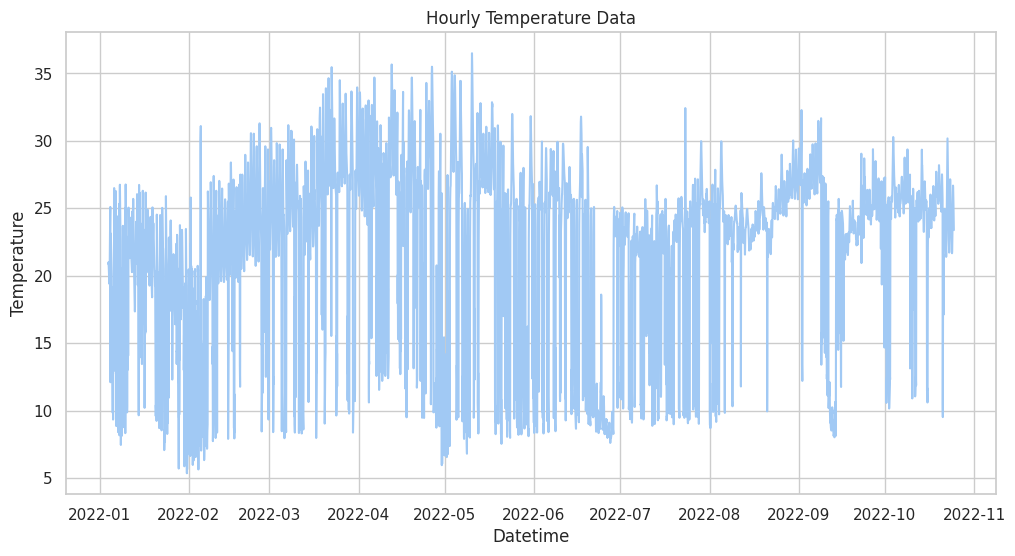

In [45]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Hourly_Temp'])
plt.title('Hourly Temperature Data')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()


Step 5: Check Stationarity

In [46]:
# Define a function to check stationarity and perform differencing
def test_stationarity(timeseries):
    # Dickey-Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value

    return dfoutput

# Check stationarity
result = test_stationarity(data['Hourly_Temp'])
print("Augmented Dickey-Fuller Test:")
print(result)

Augmented Dickey-Fuller Test:
Test Statistic                -9.396891e+00
p-value                        6.338903e-16
#Lags Used                     2.500000e+01
Number of Observations Used    7.030000e+03
Critical Value (1%)           -3.431281e+00
Critical Value (5%)           -2.861951e+00
Critical Value (10%)          -2.566989e+00
dtype: float64


Step 6: Perform Differencing

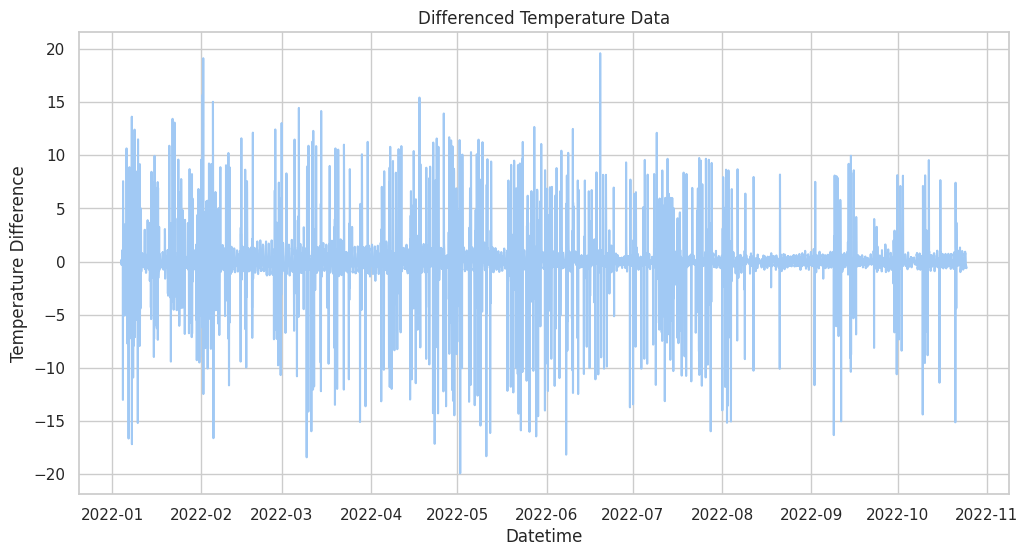

In [47]:
# Differencing to make the series stationary
data['Temp_Diff'] = data['Hourly_Temp'] - data['Hourly_Temp'].shift(1)
data.dropna(inplace=True)

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['Temp_Diff'])
plt.title('Differenced Temperature Data')
plt.xlabel('Datetime')
plt.ylabel('Temperature Difference')
plt.grid(True)
plt.show()

Step 7: Check Stationarity of Differenced Data

In [48]:
# Check stationarity of differenced data
result = test_stationarity(data['Temp_Diff'])
print("Augmented Dickey-Fuller Test on Differenced Data:")
print(result)

Augmented Dickey-Fuller Test on Differenced Data:
Test Statistic                  -20.546080
p-value                           0.000000
#Lags Used                       35.000000
Number of Observations Used    7019.000000
Critical Value (1%)              -3.431282
Critical Value (5%)              -2.861952
Critical Value (10%)             -2.566989
dtype: float64


Step 8: Fit SARIMA Model

In [50]:
# Fit SARIMA model
model = SARIMAX(data['Hourly_Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
results = model.fit(disp=False)

Step 9: Forecast Future Values

In [51]:
# Forecast future values
forecast_steps = 24  # Adjust this as needed
forecast = results.get_forecast(steps=forecast_steps)


Step 10: Create Date Range for Forecasting

In [52]:
# Create a date range for forecasting
date_range = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='H')

Step 11: Get Forecasted Values and Confidence Intervals

In [53]:
# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

Step 12: Create a Forecast DataFrame

In [54]:
# Create a forecast DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast_values, 'Lower_CI': forecast_conf_int.iloc[:, 0], 'Upper_CI': forecast_conf_int.iloc[:, 1]}, index=date_range[1:])

Step 13: Plot the Original Data and the Forecast

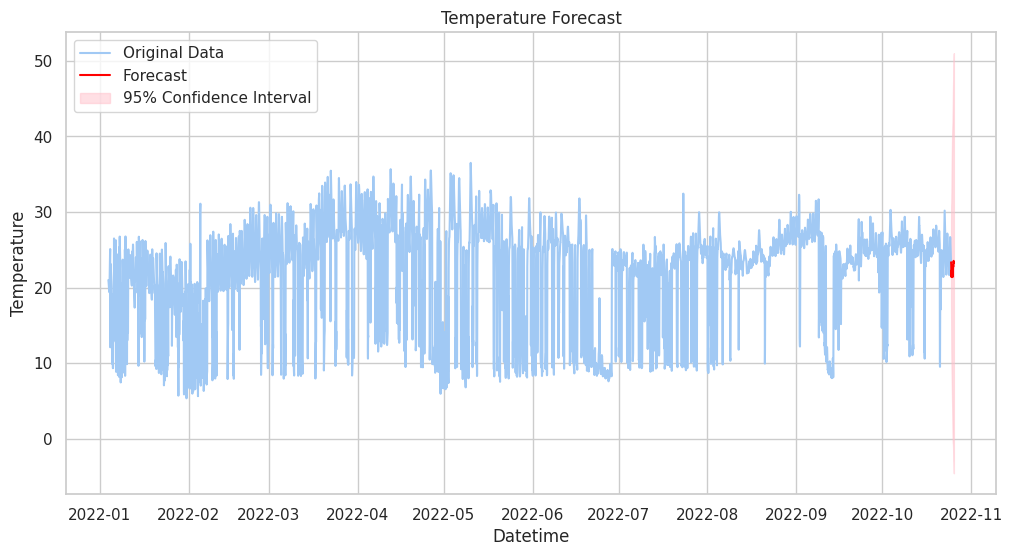

In [55]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Hourly_Temp'], label='Original Data')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.5, label='95% Confidence Interval')
plt.title('Temperature Forecast')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# ARIMA-SARIMA Forecast
Yahoo Stock

Step 1: Import necessary libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

Step 2: Load and prepare the dataset

In [65]:
data = pd.read_csv('/content/yahoo_stock.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
stock_data = data['Close']

Step 3: Split the data into training and testing sets

In [66]:
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]

Step 4: Train the ARIMA model

In [67]:
p, d, q = 1, 1, 1
model_arima = ARIMA(train, order=(p, d, q))
results_arima = model_arima.fit()

Step 5: Forecast using the ARIMA model

In [68]:
forecast_arima = results_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')


Step 6: Train the SARIMA model

In [69]:
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12
model_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results_sarima = model_sarima.fit()

Step 7: Forecast using the SARIMA model

In [70]:
forecast_sarima = results_sarima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

Step 8: Plot the ARIMA and SARIMA forecasts

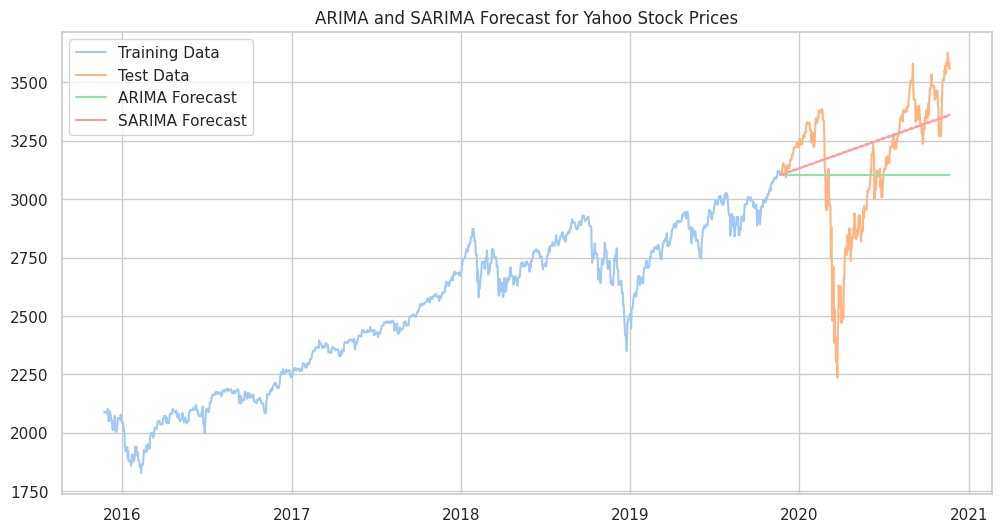

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.title('ARIMA and SARIMA Forecast for Yahoo Stock Prices')
plt.legend()
plt.show()

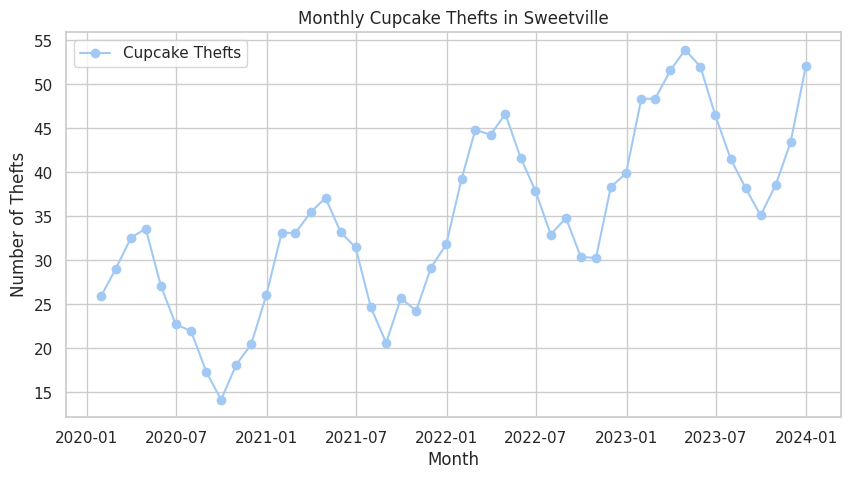

Tuning ARIMA parameters...
Best ARIMA order: (2, 1, 3) with AIC: 178.89

Tuning SARIMA parameters...
Best SARIMA order: (0, 1, 2) Seasonal order: (1, 1, 0, 12) with AIC: 111.09


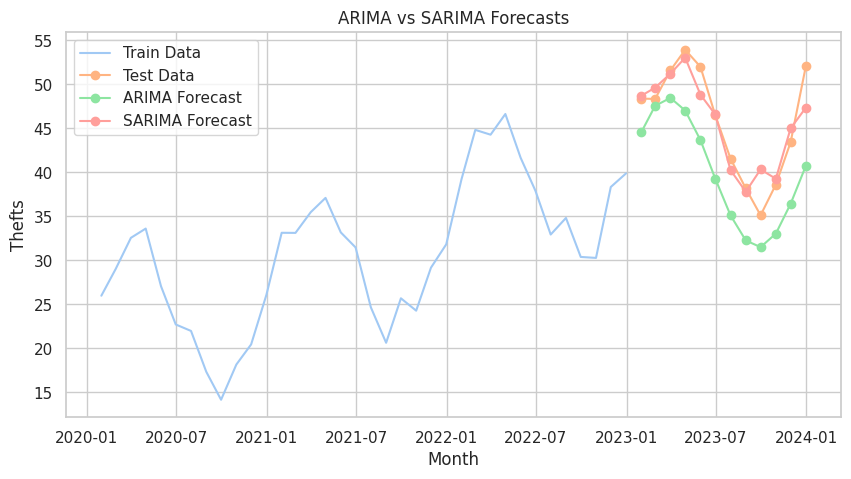


Model Performance Metrics:
ARIMA - RMSE: 6.41, MAE: 5.84, MAPE: 12.79%
SARIMA - RMSE: 2.37, MAE: 1.67, MAPE: 3.78%

ARIMA AIC: 178.89, BIC: 188.22
SARIMA AIC: 111.09, BIC: 115.63

ARIMA R²: -0.12
SARIMA R²: 0.85

Ljung-Box Test p-values:
ARIMA: 0.9322
SARIMA: 0.8079

Model Comparison Summary:
    Model      Order Seasonal Order      RMSE       MAE       MAPE  \
0   ARIMA  (2, 1, 3)           None  6.406271  5.839098  12.790879   
1  SARIMA  (0, 1, 2)  (1, 1, 0, 12)  2.366525  1.667117   3.782388   

          AIC         BIC        R²  Ljung-Box p  
0  178.892222  188.224311 -0.121813     0.932213  
1  111.092692  115.634669  0.846915     0.807868  


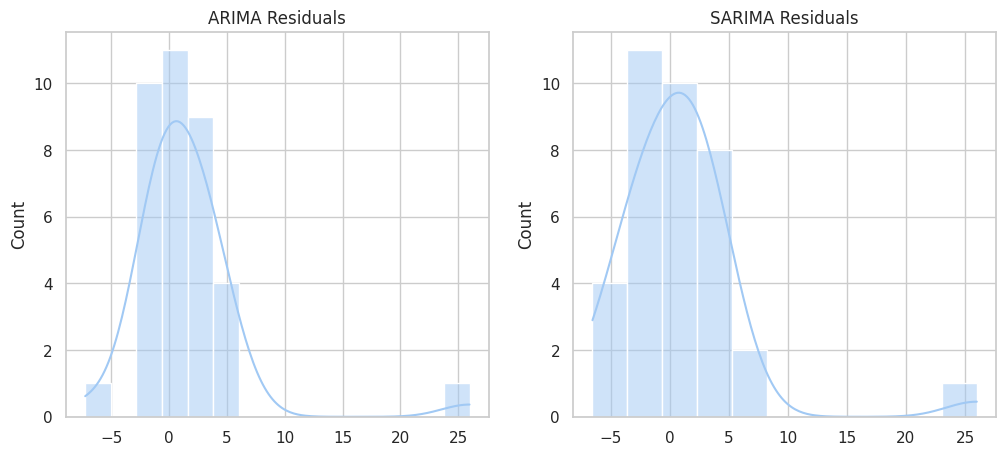

In [74]:
# ARIMA & SARIMA Time Series Modeling with Hyperparameter Tuning
# Full step-by-step code with inline comments, explanations & insights

# Step 1 — Install required packages
# We need statsmodels for ARIMA/SARIMA, sklearn for metrics, seaborn/matplotlib for plotting
!pip install statsmodels seaborn

# Step 2 — Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Improve plot style
sns.set_style("whitegrid")

# Step 3 — Simulate monthly time series data with trend and seasonality
np.random.seed(42)  # ensures reproducibility

months = pd.date_range(start="2020-01-01", periods=48, freq="M")  # 4 years of monthly data
trend = np.linspace(20, 50, 48)  # gradual increase in thefts over time
seasonality = 10 * np.sin(2 * np.pi * months.month / 12)  # yearly seasonal cycle
noise = np.random.normal(0, 2, 48)  # random noise to mimic real-world variation

# Combine trend + seasonality + noise to create dataset
thefts = trend + seasonality + noise
data = pd.DataFrame({"Month": months, "Thefts": thefts})
data.set_index("Month", inplace=True)

# Step 4 — Visualize the dataset
plt.figure(figsize=(10, 5))
plt.plot(data.index, data["Thefts"], marker="o", label="Cupcake Thefts")
plt.title("Monthly Cupcake Thefts in Sweetville")
plt.xlabel("Month")
plt.ylabel("Number of Thefts")
plt.legend()
plt.show()

# Insight: This plot helps us visually detect trend and seasonality patterns
# Outcome: We clearly see both upward trend and yearly seasonality

# Step 5 — Split dataset into training and testing
train = data.iloc[:-12]  # use first 36 months for training
test = data.iloc[-12:]   # last 12 months for testing forecasts

# Insight: This allows us to train the model and then evaluate it on unseen data

# Step 6 — Hyperparameter tuning for ARIMA manually
print("Tuning ARIMA parameters...")

best_aic = np.inf  # Initialize best AIC to a large number
best_order = None
best_arima_model = None

# Try different combinations of p,d,q parameters
for p in range(0, 4):
    for d in range(0, 2):
        for q in range(0, 4):
            try:
                model = ARIMA(train, order=(p,d,q))
                results = model.fit()
                if results.aic < best_aic:  # choose model with lowest AIC
                    best_aic = results.aic
                    best_order = (p,d,q)
                    best_arima_model = results
            except:
                continue

print(f"Best ARIMA order: {best_order} with AIC: {best_aic:.2f}")

# Insight: ARIMA order tuning is crucial — different orders change accuracy significantly
# Outcome: We select the order with the best balance of fit and simplicity (lowest AIC)

# Step 7 — Hyperparameter tuning for SARIMA manually
print("\nTuning SARIMA parameters...")

best_sarima_aic = np.inf
best_sarima_order = None
best_seasonal_order = None
best_sarima_model = None

# Try different seasonal parameter combinations
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
m = 12  # yearly seasonality

for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        try:
                            model = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,m))
                            results = model.fit(disp=False)
                            if results.aic < best_sarima_aic:  # pick best AIC
                                best_sarima_aic = results.aic
                                best_sarima_order = (p,d,q)
                                best_seasonal_order = (P,D,Q,m)
                                best_sarima_model = results
                        except:
                            continue

print(f"Best SARIMA order: {best_sarima_order} Seasonal order: {best_seasonal_order} with AIC: {best_sarima_aic:.2f}")

# Insight: SARIMA tuning considers seasonal effects — more complex but can greatly improve accuracy
# Outcome: Best SARIMA parameters minimize AIC and capture seasonality

# Step 8 — Forecast with both tuned models
arima_forecast = best_arima_model.forecast(steps=len(test))
sarima_forecast = best_sarima_model.get_forecast(steps=len(test)).predicted_mean

# Step 9 — Plot forecasts vs actual
plt.figure(figsize=(10, 5))
plt.plot(train.index, train["Thefts"], label="Train Data")
plt.plot(test.index, test["Thefts"], label="Test Data", marker="o")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast", marker="o")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", marker="o")
plt.title("ARIMA vs SARIMA Forecasts")
plt.xlabel("Month")
plt.ylabel("Thefts")
plt.legend()
plt.show()

# Insight: Visual inspection helps compare how close forecasts are to actuals
# Outcome: SARIMA should follow seasonal patterns more closely

# Step 10 — Evaluation metrics function
def calculate_metrics(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    # Handle potential division by zero in MAPE
    mape = np.mean(np.abs((actual - predicted) / actual.replace(0, np.nan))) * 100
    return rmse, mae, mape

# Step 11 — Calculate metrics for both models
arima_rmse, arima_mae, arima_mape = calculate_metrics(test['Thefts'], arima_forecast)
sarima_rmse, sarima_mae, sarima_mape = calculate_metrics(test['Thefts'], sarima_forecast)

print("\nModel Performance Metrics:")
print(f"ARIMA - RMSE: {arima_rmse:.2f}, MAE: {arima_mae:.2f}, MAPE: {arima_mape:.2f}%")
print(f"SARIMA - RMSE: {sarima_rmse:.2f}, MAE: {sarima_mae:.2f}, MAPE: {sarima_mape:.2f}%")

# Insight: Lower RMSE, MAE, MAPE means better forecast accuracy
# Outcome: Compare models quantitatively

# Step 12 — AIC & BIC
print(f"\nARIMA AIC: {best_arima_model.aic:.2f}, BIC: {best_arima_model.bic:.2f}")
print(f"SARIMA AIC: {best_sarima_model.aic:.2f}, BIC: {best_sarima_model.bic:.2f}")

# Insight: Lower AIC/BIC indicates a better balance between fit and complexity

# Step 13 — R² calculation
def r_squared(actual, predicted):
    ss_res = np.sum((actual - predicted) ** 2)
    ss_tot = np.sum((actual - np.mean(actual)) ** 2)
    return 1 - (ss_res / ss_tot)

print(f"\nARIMA R²: {r_squared(test['Thefts'], arima_forecast):.2f}")
print(f"SARIMA R²: {r_squared(test['Thefts'], sarima_forecast):.2f}")

# Insight: R² close to 1 means the model explains more variance in data

# Step 14 — Ljung-Box test for autocorrelation in residuals
lb_arima = acorr_ljungbox(best_arima_model.resid, lags=[10], return_df=True)
lb_sarima = acorr_ljungbox(best_sarima_model.resid, lags=[10], return_df=True)

print("\nLjung-Box Test p-values:")
print(f"ARIMA: {lb_arima['lb_pvalue'].values[0]:.4f}")
print(f"SARIMA: {lb_sarima['lb_pvalue'].values[0]:.4f}")

# Insight: p-value > 0.05 → residuals are white noise, meaning model fits well

# Step 15 — Summary table of results
summary = pd.DataFrame({
    "Model": ["ARIMA", "SARIMA"],
    "Order": [best_order, best_sarima_order],
    "Seasonal Order": [None, best_seasonal_order],
    "RMSE": [arima_rmse, sarima_rmse],
    "MAE": [arima_mae, sarima_mae],
    "MAPE": [arima_mape, sarima_mape],
    "AIC": [best_arima_model.aic, best_sarima_model.aic],
    "BIC": [best_arima_model.bic, best_sarima_model.bic],
    "R²": [r_squared(test['Thefts'], arima_forecast), r_squared(test['Thefts'], sarima_forecast)],
    "Ljung-Box p": [lb_arima['lb_pvalue'].values[0], lb_sarima['lb_pvalue'].values[0]]
})

print("\nModel Comparison Summary:")
print(summary)

# Step 16 — Residual analysis to check forecast quality
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(best_arima_model.resid, kde=True)
plt.title("ARIMA Residuals")

plt.subplot(1, 2, 2)
sns.histplot(best_sarima_model.resid, kde=True)
plt.title("SARIMA Residuals")
plt.show()

# Insight: Residual distribution close to normal with no pattern → good model fit